<a href="https://colab.research.google.com/github/Moh-Bxd/StartupSecussPredic/blob/main/startupPredection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json



mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download manishkc06/startup-success-prediction
! unzip ./startup-success-prediction

  0% 0.00/64.1k [00:00<?, ?B/s]
100% 64.1k/64.1k [00:00<00:00, 53.6MB/s]
Archive:  ./startup-success-prediction.zip
  inflating: startup data.csv        


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./startup data.csv')

In [ ]:
pd.set_option('display.max_columns',None)
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,CA,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,MA,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,CA,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [ ]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [ ]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [ ]:
for i in df.columns:
    if df[i].isnull().any():
        nullperc = df[i].isnull().sum()/df.shape[0] * 100
        print(f'null percentage of {i} is {round(nullperc,ndigits=3)}')

null percentage of Unnamed: 6 is 53.413
null percentage of closed_at is 63.705
null percentage of age_first_milestone_year is 16.468
null percentage of age_last_milestone_year is 16.468
null percentage of state_code.1 is 0.108


In [ ]:
df.drop(['Unnamed: 6','state_code.1','zip_code','id','Unnamed: 0','object_id','state_code'],axis = 1,inplace = True)

In [ ]:
df[(pd.to_datetime(df['closed_at']) - pd.to_datetime(df['founded_at'])<'0')]

,latitude,longitude,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
73,37.779026,-122.401840,San Francisco,adBrite,1,1/1/2003,2/1/2001,9/1/2004,5/1/2012,1.6685,9.3370,7.3808,10.4740,17,4,40400000,3,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1.6667,1,acquired
88,37.388869,-122.072353,Mountain View,Yub,0,1/1/2013,1/1/2005,11/19/2013,11/19/2013,0.8822,0.8822,NaN,NaN,7,1,12000000,0,1,0,0,0,0,ecommerce,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,9.0000,1,closed
558,40.743662,-73.984268,New York,Advaliant,0,4/16/2013,5/4/2009,4/1/2004,4/1/2004,-9.0466,-9.0466,-6.0466,-3.8822,6,1,100000,2,0,1,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.0000,0,closed


In [ ]:
df.drop(df[(pd.to_datetime(df['closed_at']) - pd.to_datetime(df['founded_at'])<'0')].index,inplace = True)

In [ ]:
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['closed_at'] = (pd.to_datetime('1-1-2024') - df['closed_at']).fillna('0')

In [ ]:
lst = ['age_first_milestone_year','age_last_milestone_year']
df[lst] = df[lst].fillna(0)

In [ ]:
lst = ['founded_at','first_funding_at','last_funding_at']
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])

<Axes: xlabel='status', ylabel='count'>

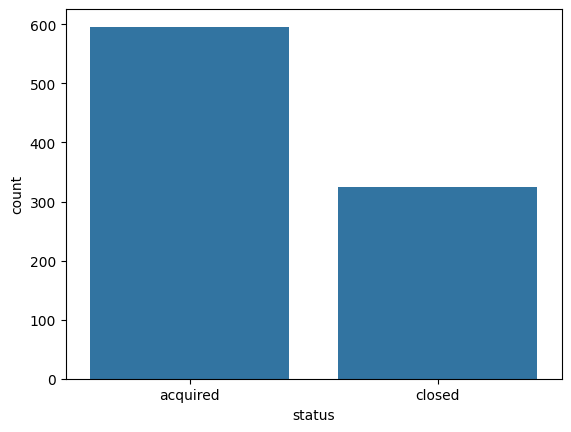

In [ ]:
sns.countplot(x = 'status', data = df)

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import L1,L2
from tensorflow.keras.models import load_model,save_model
import tensorflow as tf

In [ ]:
s = (df.dtypes == 'object')
cat_col = list(s[s].index)
cat_col

['city', 'name', 'category_code', 'status']

In [ ]:
for i in cat_col:
  lb = LabelEncoder()
  df[i] = lb.fit_transform(df[i])
df.columns

Index(['latitude', 'longitude', 'city', 'name', 'labels', 'founded_at',
       'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

In [ ]:
x,y = df.drop(['status','founded_at','first_funding_at','last_funding_at','closed_at','name','city'],axis = 1), df['status']
print(x.columns)

x_train,x_val_test,y_train,y_val_test = train_test_split(x,y,test_size= 0.30,random_state = 42)
x_test,x_val,y_test,y_val = train_test_split(x_val_test,y_val_test,test_size = 0.5,random_state = 42)


Index(['latitude', 'longitude', 'labels', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'category_code', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500'],
      dtype='object')
Index(['latitude', 'longitude', 'labels', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'category_code', 'is_software', 'is_web', 'is_mobile',
       'is

In [ ]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)
x_val_sc = sc.fit_transform(x_val)

In [ ]:
model = Sequential()

In [52]:
model.add(Dense(units=35,activation='relu',kernel_initializer='GlorotNormal'))

model.add(Dense(units=100,activation='relu',kernel_initializer='he_normal'))

model.add(Dropout(0.2))

model.add(BatchNormalization())

model.add(Dense(units=150,activation='relu',kernel_initializer='he_normal'))

model.add(Dropout(0.2))

model.add(BatchNormalization())

model.add(Dense(units=200,activation='relu',kernel_initializer='GlorotNormal'))

model.add(Dropout(0.2))

model.add(BatchNormalization())

model.add(Dense(units=1,activation='sigmoid'))


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
              tf.keras.metrics.FalseNegatives()])

In [ ]:
model.fit(x = x_train_sc,y = y_train,epochs = 700,validation_data = (x_test_sc,y_test))

Epoch 1/700
21/21 [==============================] - 4s 24ms/step - loss: 0.6536 - binary_accuracy: 0.6770 - false_negatives: 72.0000 - val_loss: 0.5241 - val_binary_accuracy: 0.7536 - val_false_negatives: 4.0000
Epoch 2/700
21/21 [==============================] - 0s 7ms/step - loss: 0.4545 - binary_accuracy: 0.7966 - false_negatives: 56.0000 - val_loss: 0.4070 - val_binary_accuracy: 0.9203 - val_false_negatives: 4.0000
Epoch 3/700
21/21 [==============================] - 0s 6ms/step - loss: 0.3543 - binary_accuracy: 0.8525 - false_negatives: 45.0000 - val_loss: 0.3026 - val_binary_accuracy: 0.9348 - val_false_negatives: 4.0000
Epoch 4/700
21/21 [==============================] - 0s 7ms/step - loss: 0.2846 - binary_accuracy: 0.8866 - false_negatives: 32.0000 - val_loss: 0.2200 - val_binary_accuracy: 0.9420 - val_false_negatives: 4.0000
Epoch 5/700
21/21 [==============================] - 0s 6ms/step - loss: 0.2342 - binary_accuracy: 0.9224 - false_negatives: 25.0000 - val_loss: 0.1675

<Axes: >

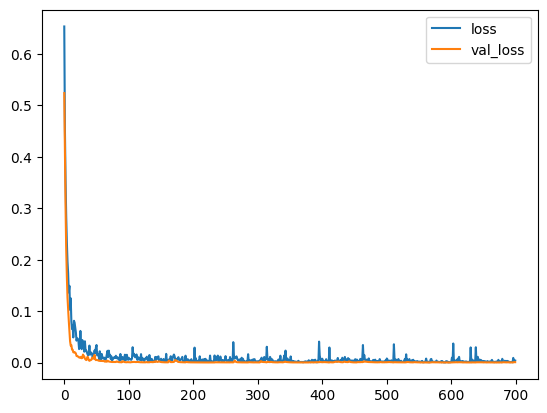

In [ ]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

<Axes: >

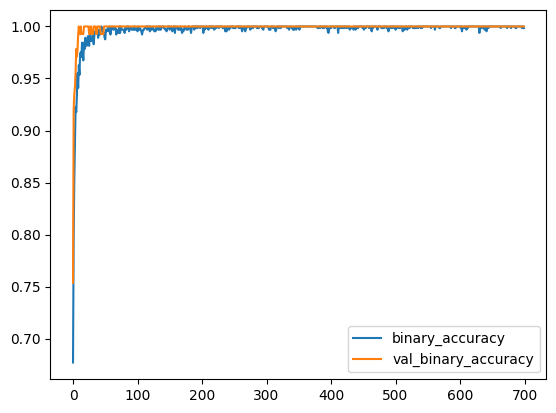

In [ ]:
pd.DataFrame(model.history.history)[['binary_accuracy','val_binary_accuracy']].plot()

In [ ]:
model.evaluate(x_val_sc,y_val)

5/5 [==============================] - 0s 4ms/step - loss: 9.8443e-05 - binary_accuracy: 1.0000 - false_negatives: 0.0000e+00


[9.844335727393627e-05, 1.0, 0.0]

In [ ]:
ypred= (model.predict(x_val_sc) > 0.5).astype("int32")
ypred

5/5 [==============================] - 0s 3ms/step


array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [ ]:
print(classification_report(y_val,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        46

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [ ]:
confusion_matrix(y_val, ypred)

array([[92,  0],
       [ 0, 46]])

In [49]:
save_model(model, 'C:\\Users\\mohaR\\OneDrive\\Desktop\\New folder (5)\\my_saved_model')

In [50]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
save_model(model, '/content/drive/My Drive/my_saved_model')